## EDA Notebook

#### In this notebook I am going to perform exploratory data analysis (EDA for short) on Data Science Salary dataset, available on Kaggle at this [link](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

#### The features are:

- work_year:	The year the salary was paid.
- experience_level:	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- employment_type:	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title:	The role worked in during the year.
- salary:	The total gross salary amount paid.
- salary_currency:	The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd:	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- employee_residence:	Employee's primary country of residence in during the work year as an ISO 3166 country code.

#### The goal is to build a model that can predict salary_in_usd value for each sample in input

Import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings("ignore")

%matplotlib inline

Define a path using Path class, then read csv file as dataframe

In [ ]:
# Define CSV path
csv_path = Path("../data") / "ds_salaries.csv" 

# Read data 
df = pd.read_csv(csv_path)

# visualize some examples
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Shape of the dataset

In [8]:
df.shape

(607, 12)

Check datatypes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Summary of the dataset

In [9]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Let's start explory the dataset in deep 

In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')

We have 5 numerical features : ['Unnamed: 0', 'work_year', 'salary', 'salary_in_usd', 'remote_ratio']
We have 7 categorical features : ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [ ]:
# percentage of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

SE    46.128501
MI    35.090610
EN    14.497529
EX     4.283361
Name: experience_level, dtype: float64
---------------------------
FT    96.869852
PT     1.647446
CT     0.823723
FL     0.658979
Name: employment_type, dtype: float64
---------------------------
Data Scientist                              23.558484
Data Engineer                               21.746293
Data Analyst                                15.980231
Machine Learning Engineer                    6.754530
Research Scientist                           2.635914
Data Science Manager                         1.976936
Data Architect                               1.812191
Big Data Engineer                            1.317957
Machine Learning Scientist                   1.317957
Principal Data Scientist                     1.153213
AI Scientist                                 1.153213
Data Science Consultant                      1.153213
Director of Data Science                     1.153213
Data Analytics Manager               

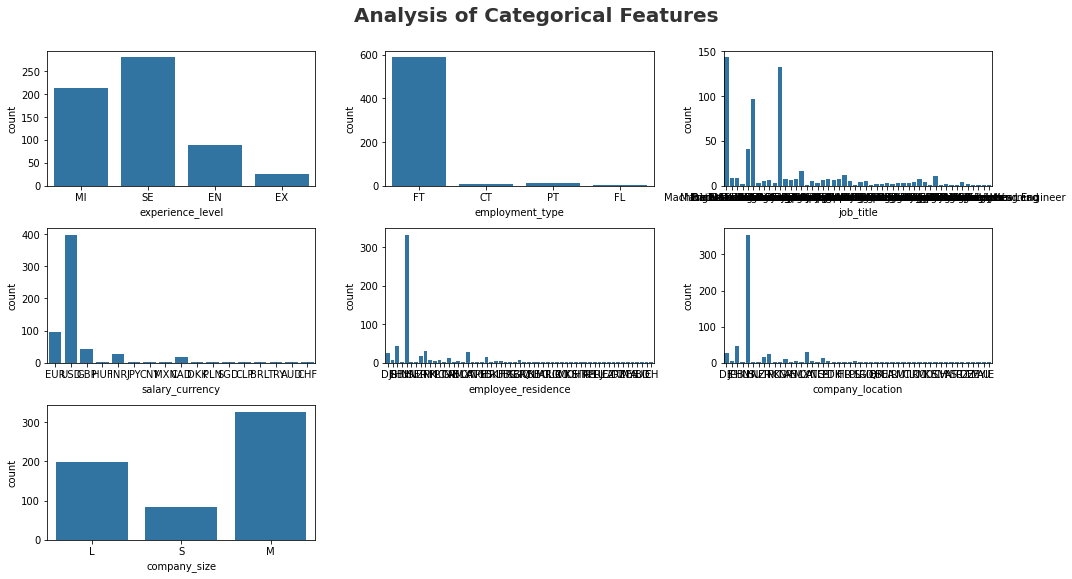

In [26]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

Insights on categorical features:
 
- Experience level has only 4 possible values, ordinal encoding might be a good idea
- Employment type has only 4 possible values but 'FT' values is above 96%, combine the other categorie might be a good idea instead of ordinal encoding on the entire categories.
- Job title has very large possible value set. This column seems to be one of the most impactful, as using a little domain knowledge, it is easy to think that the salary depends heavily on the type of job position. I will probably start with one hot encoding, then move to bucketization if the performance is not satisfactory. 
- Salary currency: I will probably delete this column because there is the column in which salary was already converted in dollars.
- Employee residence: I will probably combine most of the values in a 'Other' category to minimize dimension.
- Company location: Same action for same reason.
- Company size: With only 3 values the most rated approach is ordinal encoding.

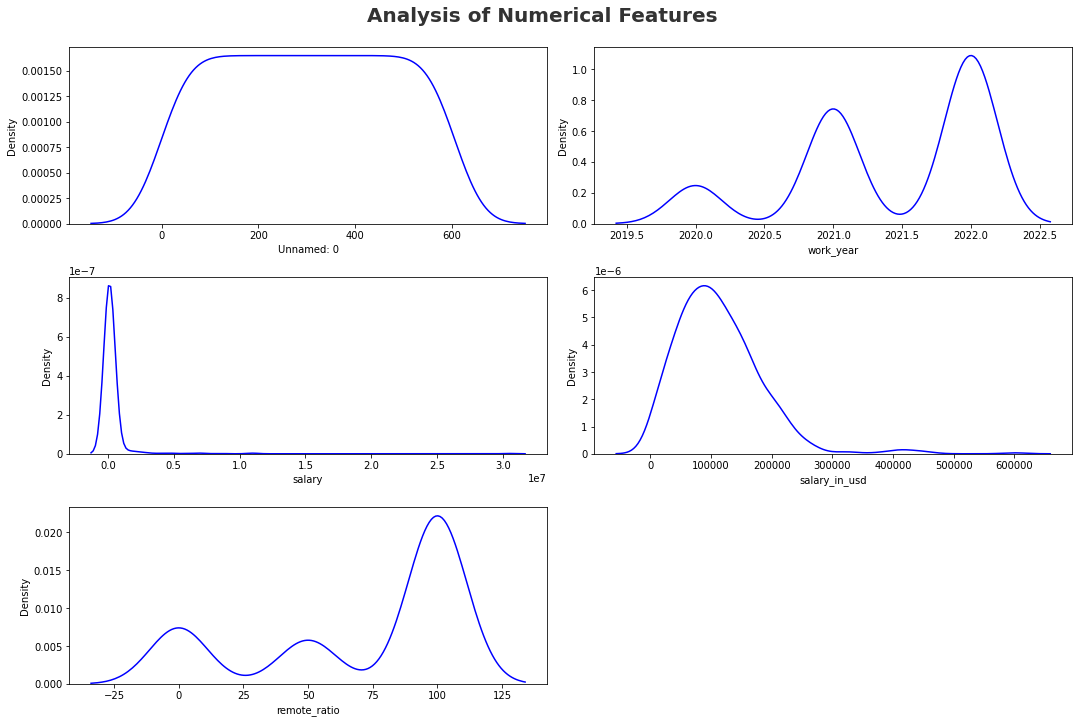

In [25]:
plt.figure(figsize=(15, 10))
plt.suptitle('Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Insights on numerical features

- Unnamed: 0: It's the ID column, I will drop it.
- Work year: It's a discrete column with 3 possible values, 2020, 2021 and 2022
- Salary: It's a high skewed column because of the outliers. The reason is the different measurement unit used to calculate salary in different country. I will drop it because there is a column with the salary value convert in USD.
- Salary in USD: The column mentioned earlier. It's probably skewed because of some high payed positions like Manager in great company or Head of Data and similar.
- Remote ratio: discrete column 0, 50 and 100 as possible values. 

Now I'll calculate the correlation between features and target column

Numeric features correlation:
work_year       0.170493
remote_ratio    0.132122
dtype: float64


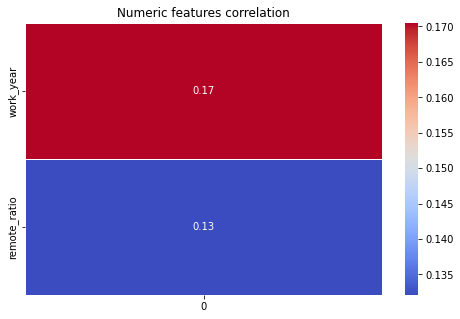

ANOVA F-test results:
              Feature   F-score       p-value
4    company_location  4.396410  4.705607e-31
3  employee_residence  3.177956  1.587753e-20
0    experience_level  1.580492  7.181900e-05
2           job_title  1.539722  1.659076e-04
5        company_size  1.414092  1.914711e-03
1     employment_type  0.882640  8.584012e-01


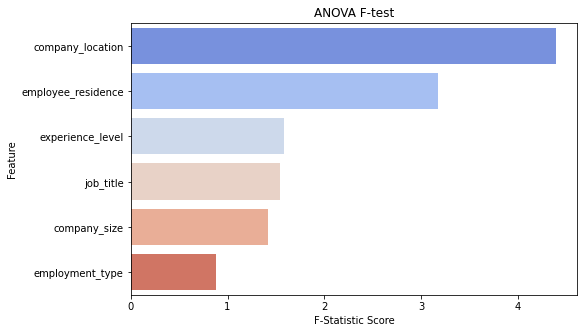

In [ ]:
# Target column
target_col = "salary_in_usd"

# Select numeric and categorical features separately
numeric_features = df.select_dtypes(include=['number']).columns.drop(["salary_in_usd", "Unnamed: 0", "salary"])
categorical_features = df.select_dtypes(exclude=['number']).columns.drop(["salary_currency"])

# Calculate correlation with numeric features 
numeric_corr = df[numeric_features].corrwith(df[target_col]).sort_values(ascending=False)
print("Numeric features correlation:")
print(numeric_corr)

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_corr.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Numeric features correlation")
plt.show()

from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()
encoder = OrdinalEncoder()
df_encoded[categorical_features] = encoder.fit_transform(df[categorical_features])

# Calculate F-score e p-value
anova_scores, p_values = f_classif(df_encoded[categorical_features], df[target_col])
anova_results = pd.DataFrame({
    'Feature': categorical_features,
    'F-score': anova_scores,
    'p-value': p_values
}).sort_values(by="F-score", ascending=False)

print("ANOVA F-test results:")
print(anova_results)

plt.figure(figsize=(8, 5))
sns.barplot(x=anova_results['F-score'], y=anova_results['Feature'], palette="coolwarm")
plt.xlabel("F-Statistic Score")
plt.ylabel("Feature")
plt.title("ANOVA F-test")
plt.show()


- Remote ratio and work year are not so influent as I expected
- Company location and employee residence are highly correlated with the salary
- Experience level and job title influence salary but less than locations
- Company size is even less influente but still significant
- Employment type is not significant, probably because it has a really low variance